In [51]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import pandas as pd
name_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 40)
address_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 28)
postcode_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 30)
atena_df = pd.read_csv("address.csv",na_filter=False)
atena_df.columns = ["index", "sei","mei", "address1","address2","postcode"]
class Atena:
  postcode=None
  address1=None
  address2=None
  sei_name=None
  mei_name=None

  name_vertical_space = 42
  name_interval_space = 30
  name_start_top = 200
  name_start_left = 250
  
  address_vertical_space = 30
  address_start_top = 180
  address2_start_top = 180
  address_start_left = 400
  address2_start_left = 350

  postcode_space = 32
  postcode_top = 60
  postcode_left1 = 215
  plane_img = Image.open("./img/muji.jpg")
  drawnImg = ImageDraw.Draw(plane_img)

  def __init__(
    self,
    postcode=None,
    address1=None,
    sei_name=None,
    mei_name=None,
    address2=None
  ):
    self.postcode=postcode
    self.address1=address1
    self.address2=address2
    self.sei_name=sei_name
    self.mei_name=mei_name

  def DrawPostcode(self):
    postcode_list = list(str(self.postcode))
    for i in range(0,3):
      self.drawnImg.text((self.postcode_left1+self.postcode_space*i,self.postcode_top),postcode_list[i],"black",font=postcode_font)
    for i in range(3,7):
      self.drawnImg.text((316+32*(i-3),60),postcode_list[i],"black",font=font)

  def DrawName(self):
    sei_list = list(self.sei_name)
    mei_list = list(self.mei_name)
    for i in range(len(sei_list)):
      self.drawnImg.text((self.name_start_left,self.name_start_top+i*self.name_vertical_space),sei_list[i],"black",font=name_font)
    for i in range(len(mei_list)):
      self.drawnImg.text((self.name_start_left,(self.name_start_top+len(sei_list)*self.name_vertical_space)+self.name_interval_space+self.name_vertical_space*i),mei_list[i],"black",font=name_font)
  
  def DrawAddress(self):
    is_address2 = False
    if self.address2 == '':
      is_address2 = False
    else:
      is_address2 = True
    address1_list = list(self.address1)
    address2_list = list(self.address2)
    for i in range(len(address1_list)):
      self.drawnImg.text((self.address_start_left,self.address_start_top+i*self.address_vertical_space),address1_list[i],"black",font=address_font)
    """
    if is_address2:
      for i in range(len(address2_list)):
        self.drawnImg.text((self.address2_start_left,self.address2_start_top + i * self.address_vertical_space),address2_list[i],"black",font=address_font)
    """
  def SaveImage(self):
    self.plane_img.save(f"./created_dir/{self.mei_name}{self.sei_name}.jpg")
  def DrawAddress(self):
    address1_list = list(self.address1)
    isAddress2 = True if self.address2 !=None else False
    self.drawnImg.text()
  def Testfunc(self):
    self.DrawName()
    self.DrawPostcode()
    self.SaveImage()
    self.DrawAddress()
    return self.plane_img

atena_ins = Atena(
  sei_name=atena_df.sei[0],
  mei_name=atena_df.mei[0],
  address1=atena_df.address1[0],
  address2=atena_df.address2[0],
  postcode=str(atena_df.postcode[0])
)

img = atena_ins.Testfunc()

img

TypeError: text() missing 2 required positional arguments: 'xy' and 'text'

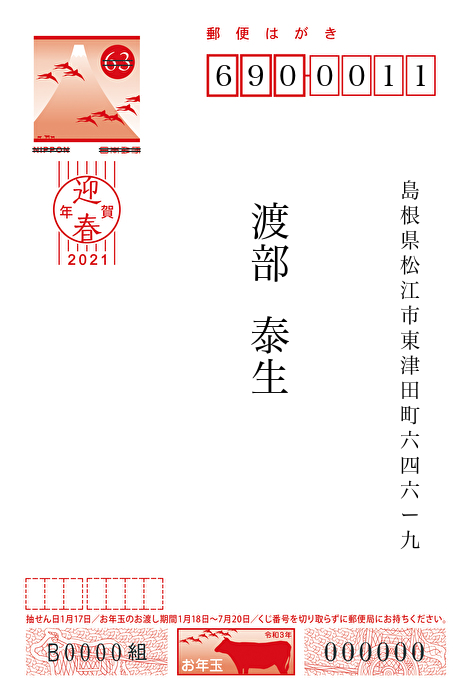

In [70]:
import PIL
from PIL import Image,ImageDraw,ImageFont
import pandas as pd

atena_df = pd.read_csv("address.csv",na_filter=False)
atena_df.columns = ["index", "sei","mei", "address1","address2","postcode"]
class Atena:
  postcode=None
  address1=None
  address2=None
  sei_name=None
  mei_name=None

  name_vertical_space = 42
  name_interval_space = 30
  name_start_top = 200
  name_start_left = 250
  
  address_vertical_space = 25
  address_start_top = 180
  address2_start_top = 180
  address_start_left = 400
  address2_start_left = 350

  postcode_space = 32
  postcode_top = 60
  postcode_left1 = 215
  name_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 40)
  address_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 24)
  postcode_font = ImageFont.truetype('ヒラギノ明朝 ProN.ttc', 30)
  plane_img = Image.open("./img/muji.jpg")
  drawnImg = ImageDraw.Draw(plane_img)

  def __init__(
    self,
    postcode=None,
    address1=None,
    sei_name=None,
    mei_name=None,
    address2=None
  ):
    self.postcode=postcode
    self.address1=address1
    self.address2=address2
    self.sei_name=sei_name
    self.mei_name=mei_name

  def DrawPostcode(self):
    postcode_list = list(str(self.postcode))
    for i in range(0,3):
      self.drawnImg.text((self.postcode_left1+self.postcode_space*i,self.postcode_top),postcode_list[i],"black",font=postcode_font)
    for i in range(3,7):
      self.drawnImg.text((316+32*(i-3),60),postcode_list[i],"black",font=postcode_font)

  def DrawName(self):
    sei_list = list(self.sei_name)
    mei_list = list(self.mei_name)
    for i in range(len(sei_list)):
      self.drawnImg.text((self.name_start_left,self.name_start_top+i*self.name_vertical_space),sei_list[i],"black",font=name_font)
    for i in range(len(mei_list)):
      self.drawnImg.text((self.name_start_left,(self.name_start_top+len(sei_list)*self.name_vertical_space)+self.name_interval_space+self.name_vertical_space*i),mei_list[i],"black",font=name_font)
  
  def DrawAddress(self):
    is_address2 = False
    if self.address2 == '':
      is_address2 = False
    else:
      is_address2 = True
    address1_list = list(self.address1)
    address2_list = list(self.address2)
    for i in range(len(address1_list)):
      self.drawnImg.text(xy=(self.address_start_left,self.address_start_top + i * self.address_vertical_space),text=address1_list[i],fill="black",font=address_font)
    
    if is_address2:
      for i in range(len(address2_list)):
        self.drawnImg.text((self.address2_start_left,self.address2_start_top + i * self.address_vertical_space),address2_list[i],"black",font=address_font)
    
  def SaveImage(self):
    self.plane_img.save(f"./created_dir/{self.mei_name}{self.sei_name}.jpg")

  def Testfunc(self):
    self.DrawName()
    self.DrawPostcode()
    self.DrawAddress()
    self.SaveImage()
    return self.plane_img

atena_ins = Atena(
  sei_name=atena_df.sei[0],
  mei_name=atena_df.mei[0],
  address1=atena_df.address1[0],
  address2=atena_df.address2[0],
  postcode=str(atena_df.postcode[0])
)

img = atena_ins.Testfunc()

img